In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
display(dbutils.fs.ls("/FileStore/tables/online_payment_fraud.csv"))

path,name,size,modificationTime
dbfs:/FileStore/tables/online_payment_fraud.csv,online_payment_fraud.csv,76688102,1701308917000


In [0]:
onlinepayFrauddf=spark.read.format("csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/online_payment_fraud.csv")

In [0]:
onlinepayFrauddf.show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|C2048537720|      41554.0|      29885.86|M123070170

In [0]:
onlinepayFrauddf.na.drop().show(truncate=False)

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|type    |amount   |nameOrig   |oldbalanceOrg|newbalanceOrig|nameDest   |oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|1   |PAYMENT |9839.64  |C1231006815|170136.0     |160296.36     |M1979787155|0.0           |0.0           |0      |0             |
|1   |PAYMENT |1864.28  |C1666544295|21249.0      |19384.72      |M2044282225|0.0           |0.0           |0      |0             |
|1   |TRANSFER|181.0    |C1305486145|181.0        |0.0           |C553264065 |0.0           |0.0           |1      |0             |
|1   |CASH_OUT|181.0    |C840083671 |181.0        |0.0           |C38997010  |21182.0       |0.0           |1      |0             |
|1   |PAYMENT |11668.14 |C2048537720|41554.0      |29885.86      |M123070170

In [0]:
onlinepayFrauddf.drop("nameOrig","nameDest") \
    .printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



In [0]:
onlinepayFrauddf=onlinepayFrauddf.drop("nameOrig")

In [0]:
onlinepayFrauddf=onlinepayFrauddf.drop("nameDest")

In [0]:
onlinepayFrauddf.show()

+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|step|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|     170136.0|     160296.36|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|      21249.0|      19384.72|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|        181.0|           0.0|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0|        181.0|           0.0|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|      41554.0|      29885.86|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  7817.71|      53860.0|      46042.29|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  7107.77|   

In [0]:
onlinepayFrauddf.show()

+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|step|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|     170136.0|     160296.36|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|      21249.0|      19384.72|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|        181.0|           0.0|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0|        181.0|           0.0|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|      41554.0|      29885.86|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  7817.71|      53860.0|      46042.29|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  7107.77|   

In [0]:
display(onlinepayFrauddf)

step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0
1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.0,0,0
1,PAYMENT,4024.36,2671.0,0.0,0.0,0.0,0,0
1,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0,0


In [0]:
onlinepayFrauddf.createOrReplaceTempView("online_payment_fraud_table")


In [0]:
result = spark.sql("""
    SELECT type, ROUND(AVG(amount), 2) AS average_amount,
           row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type = 'PAYMENT'
    GROUP BY type, step
""")
result.show()

+-------+--------------+-----------+
|   type|average_amount|step_number|
+-------+--------------+-----------+
|PAYMENT|        6090.3|          1|
|PAYMENT|       7093.86|          2|
|PAYMENT|       9530.41|          3|
|PAYMENT|       4294.24|          4|
|PAYMENT|        6312.4|          5|
|PAYMENT|      12213.16|          6|
|PAYMENT|       7778.66|          7|
|PAYMENT|        9556.0|          8|
|PAYMENT|      12862.11|          9|
|PAYMENT|      11900.64|         10|
|PAYMENT|      13290.75|         11|
|PAYMENT|      13526.27|         12|
|PAYMENT|      14182.79|         13|
|PAYMENT|      10193.44|         14|
|PAYMENT|      11191.76|         15|
|PAYMENT|       12231.9|         16|
|PAYMENT|      12803.37|         17|
|PAYMENT|      10871.65|         18|
|PAYMENT|       9674.31|         19|
|PAYMENT|        9136.2|         20|
+-------+--------------+-----------+
only showing top 20 rows



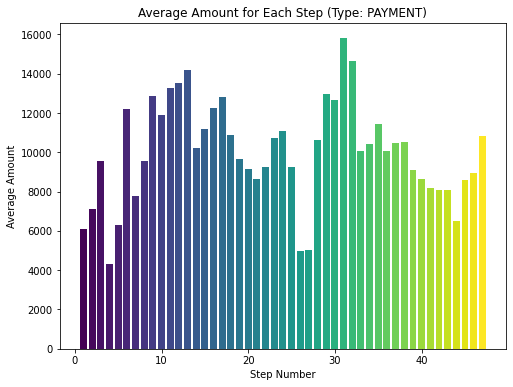

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming result1 DataFrame is available and contains 'step_number' and 'average_amount' columns
result_df = result.toPandas()

# Get unique step numbers to assign colors
unique_steps = result_df['step_number'].unique()

# Generate a color map based on the number of unique steps
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_steps)))  # You can change the colormap as needed

# Plotting with colors
plt.figure(figsize=(8, 6))
for i, step in enumerate(unique_steps):
    step_data = result_df[result_df['step_number'] == step]
    plt.bar(step_data['step_number'], step_data['average_amount'], color=colors[i], label=f'Step {step}')

plt.xlabel('Step Number')
plt.ylabel('Average Amount')
plt.title('Average Amount for Each Step (Type: PAYMENT)')
plt.show()


In [0]:
result = spark.sql("""
    SELECT type, ROUND(AVG(amount), 2) AS average_amount,
           row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type = 'TRANSFER'
    GROUP BY type, step
""")
result.show()

+--------+--------------+-----------+
|    type|average_amount|step_number|
+--------+--------------+-----------+
|TRANSFER|     450352.78|          1|
|TRANSFER|     411173.59|          2|
|TRANSFER|      404983.9|          3|
|TRANSFER|     604132.72|          4|
|TRANSFER|      249374.6|          5|
|TRANSFER|     424021.62|          6|
|TRANSFER|     574647.71|          7|
|TRANSFER|     812172.41|          8|
|TRANSFER|     964588.47|          9|
|TRANSFER|    1008708.31|         10|
|TRANSFER|     864389.72|         11|
|TRANSFER|     794708.54|         12|
|TRANSFER|     730553.54|         13|
|TRANSFER|     588263.31|         14|
|TRANSFER|     556655.73|         15|
|TRANSFER|     582721.27|         16|
|TRANSFER|     642232.35|         17|
|TRANSFER|      537108.3|         18|
|TRANSFER|     510232.41|         19|
|TRANSFER|     533123.88|         20|
+--------+--------------+-----------+
only showing top 20 rows



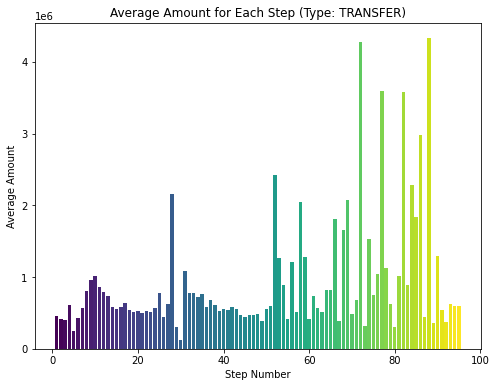

In [0]:
# Assuming result1 DataFrame is available and contains 'step_number' and 'average_amount' columns
result_df = result.toPandas()

# Get unique step numbers to assign colors
unique_steps = result_df['step_number'].unique()

# Generate a color map based on the number of unique steps
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_steps)))  # You can change the colormap as needed

# Plotting with colors
plt.figure(figsize=(8, 6))
for i, step in enumerate(unique_steps):
    step_data = result_df[result_df['step_number'] == step]
    plt.bar(step_data['step_number'], step_data['average_amount'], color=colors[i], label=f'Step {step}')

plt.xlabel('Step Number')
plt.ylabel('Average Amount')
plt.title('Average Amount for Each Step (Type: TRANSFER)')
plt.show()

In [0]:
result = spark.sql("""
    SELECT type, ROUND(AVG(amount), 2) AS average_amount,
           row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type = 'DEBIT'
    GROUP BY type, step
""")
result.show()

+-----+--------------+-----------+
| type|average_amount|step_number|
+-----+--------------+-----------+
|DEBIT|        4484.0|          1|
|DEBIT|       3389.42|          2|
|DEBIT|       3855.19|          3|
|DEBIT|        717.26|          4|
|DEBIT|        1983.4|          5|
|DEBIT|       3309.36|          6|
|DEBIT|       3621.68|          7|
|DEBIT|        3429.9|          8|
|DEBIT|       4890.29|          9|
|DEBIT|       4477.86|         10|
|DEBIT|       5564.03|         11|
|DEBIT|      35075.98|         12|
|DEBIT|        4143.0|         13|
|DEBIT|       5043.67|         14|
|DEBIT|       4712.55|         15|
|DEBIT|       3906.46|         16|
|DEBIT|       5080.43|         17|
|DEBIT|       3929.51|         18|
|DEBIT|       3400.63|         19|
|DEBIT|       5383.19|         20|
+-----+--------------+-----------+
only showing top 20 rows



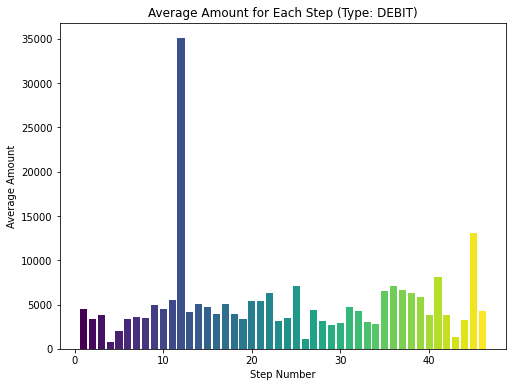

In [0]:
# Assuming result1 DataFrame is available and contains 'step_number' and 'average_amount' columns
result_df = result.toPandas()

# Get unique step numbers to assign colors
unique_steps = result_df['step_number'].unique()

# Generate a color map based on the number of unique steps
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_steps)))  # You can change the colormap as needed

# Plotting with colors
plt.figure(figsize=(8, 6))
for i, step in enumerate(unique_steps):
    step_data = result_df[result_df['step_number'] == step]
    plt.bar(step_data['step_number'], step_data['average_amount'], color=colors[i], label=f'Step {step}')

plt.xlabel('Step Number')
plt.ylabel('Average Amount')
plt.title('Average Amount for Each Step (Type: DEBIT)')
plt.show()

In [0]:
result = spark.sql("""
    SELECT type, ROUND(AVG(amount), 2) AS average_amount,
           row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type='CASH_OUT'
    GROUP BY type, step
""")
result.show()

+--------+--------------+-----------+
|    type|average_amount|step_number|
+--------+--------------+-----------+
|CASH_OUT|     171726.23|          1|
|CASH_OUT|      153290.8|          2|
|CASH_OUT|      92974.43|          3|
|CASH_OUT|     295081.58|          4|
|CASH_OUT|     168901.78|          5|
|CASH_OUT|     174147.08|          6|
|CASH_OUT|     177174.18|          7|
|CASH_OUT|     178684.26|          8|
|CASH_OUT|     192198.85|          9|
|CASH_OUT|     210065.04|         10|
|CASH_OUT|     215793.12|         11|
|CASH_OUT|     209581.15|         12|
|CASH_OUT|     201149.46|         13|
|CASH_OUT|     194601.34|         14|
|CASH_OUT|     190455.62|         15|
|CASH_OUT|      189087.6|         16|
|CASH_OUT|     181921.03|         17|
|CASH_OUT|     164330.69|         18|
|CASH_OUT|     154999.98|         19|
|CASH_OUT|      143607.5|         20|
+--------+--------------+-----------+
only showing top 20 rows



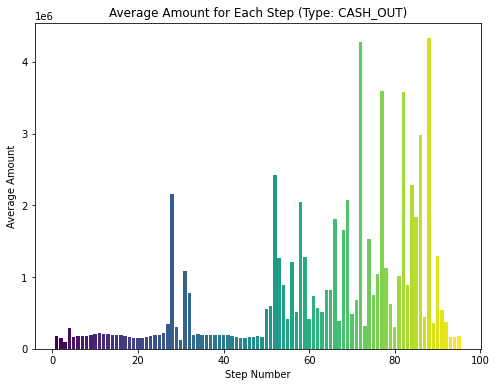

In [0]:
# Assuming result1 DataFrame is available and contains 'step_number' and 'average_amount' columns
result_df = result.toPandas()

# Get unique step numbers to assign colors
unique_steps = result_df['step_number'].unique()

# Generate a color map based on the number of unique steps
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_steps)))  # You can change the colormap as needed

# Plotting with colors
plt.figure(figsize=(8, 6))
for i, step in enumerate(unique_steps):
    step_data = result_df[result_df['step_number'] == step]
    plt.bar(step_data['step_number'], step_data['average_amount'], color=colors[i], label=f'Step {step}')

plt.xlabel('Step Number')
plt.ylabel('Average Amount')
plt.title('Average Amount for Each Step (Type: CASH_OUT)')
plt.show()

In [0]:
result = spark.sql("""
    SELECT type, isFraud, isFlaggedFraud, 
    row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type='CASH_OUT'
    GROUP BY type, isFraud , isFlaggedFraud, step
""")
result.show()

+--------+-------+--------------+-----------+
|    type|isFraud|isFlaggedFraud|step_number|
+--------+-------+--------------+-----------+
|CASH_OUT|      1|             0|          1|
|CASH_OUT|      0|             0|          2|
|CASH_OUT|      1|             0|          3|
|CASH_OUT|      0|             0|          4|
|CASH_OUT|      1|             0|          5|
|CASH_OUT|      0|             0|          6|
|CASH_OUT|      1|             0|          7|
|CASH_OUT|      0|             0|          8|
|CASH_OUT|      0|             0|          9|
|CASH_OUT|      1|             0|         10|
|CASH_OUT|      0|             0|         11|
|CASH_OUT|      1|             0|         12|
|CASH_OUT|      1|             0|         13|
|CASH_OUT|      0|             0|         14|
|CASH_OUT|      0|             0|         15|
|CASH_OUT|      1|             0|         16|
|CASH_OUT|      1|             0|         17|
|CASH_OUT|      0|             0|         18|
|CASH_OUT|      1|             0| 

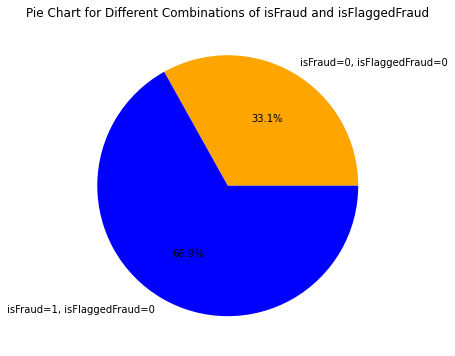

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
result_df = result.toPandas()

# Get counts of unique combinations of isFraud and isFlaggedFraud columns
counts = result_df.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')

# Define labels and colors
labels = [f'isFraud={row["isFraud"]}, isFlaggedFraud={row["isFlaggedFraud"]}' for idx, row in counts.iterrows()]
colors = ['orange', 'blue']  # Define colors based on your requirements

# Plotting the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(counts['count'], labels=labels, colors=[colors[i] for i in range(len(counts))], autopct='%1.1f%%')
plt.title('Pie Chart for Different Combinations of isFraud and isFlaggedFraud')
plt.show()


In [0]:
result = spark.sql("""
    SELECT type, isFraud, isFlaggedFraud, 
    row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type='PAYMENT'
    GROUP BY type, isFraud , isFlaggedFraud, step
""")
result.show()

+-------+-------+--------------+-----------+
|   type|isFraud|isFlaggedFraud|step_number|
+-------+-------+--------------+-----------+
|PAYMENT|      0|             0|          1|
|PAYMENT|      0|             0|          2|
|PAYMENT|      0|             0|          3|
|PAYMENT|      0|             0|          4|
|PAYMENT|      0|             0|          5|
|PAYMENT|      0|             0|          6|
|PAYMENT|      0|             0|          7|
|PAYMENT|      0|             0|          8|
|PAYMENT|      0|             0|          9|
|PAYMENT|      0|             0|         10|
|PAYMENT|      0|             0|         11|
|PAYMENT|      0|             0|         12|
|PAYMENT|      0|             0|         13|
|PAYMENT|      0|             0|         14|
|PAYMENT|      0|             0|         15|
|PAYMENT|      0|             0|         16|
|PAYMENT|      0|             0|         17|
|PAYMENT|      0|             0|         18|
|PAYMENT|      0|             0|         19|
|PAYMENT| 

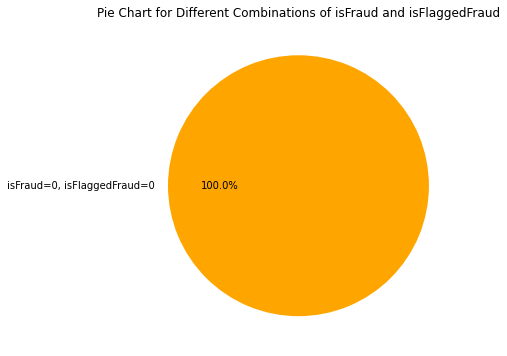

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
result_df = result.toPandas()

# Get counts of unique combinations of isFraud and isFlaggedFraud columns
counts = result_df.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')

# Define labels and colors
labels = [f'isFraud={row["isFraud"]}, isFlaggedFraud={row["isFlaggedFraud"]}' for idx, row in counts.iterrows()]
colors = ['orange', 'blue']  # Define colors based on your requirements

# Plotting the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(counts['count'], labels=labels, colors=[colors[i] for i in range(len(counts))], autopct='%1.1f%%')
plt.title('Pie Chart for Different Combinations of isFraud and isFlaggedFraud')
plt.show()


In [0]:
result = spark.sql("""
    SELECT type, isFraud, isFlaggedFraud, 
    row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type='DEBIT'
    GROUP BY type, isFraud , isFlaggedFraud, step
""")
result.show()

+-----+-------+--------------+-----------+
| type|isFraud|isFlaggedFraud|step_number|
+-----+-------+--------------+-----------+
|DEBIT|      0|             0|          1|
|DEBIT|      0|             0|          2|
|DEBIT|      0|             0|          3|
|DEBIT|      0|             0|          4|
|DEBIT|      0|             0|          5|
|DEBIT|      0|             0|          6|
|DEBIT|      0|             0|          7|
|DEBIT|      0|             0|          8|
|DEBIT|      0|             0|          9|
|DEBIT|      0|             0|         10|
|DEBIT|      0|             0|         11|
|DEBIT|      0|             0|         12|
|DEBIT|      0|             0|         13|
|DEBIT|      0|             0|         14|
|DEBIT|      0|             0|         15|
|DEBIT|      0|             0|         16|
|DEBIT|      0|             0|         17|
|DEBIT|      0|             0|         18|
|DEBIT|      0|             0|         19|
|DEBIT|      0|             0|         20|
+-----+----

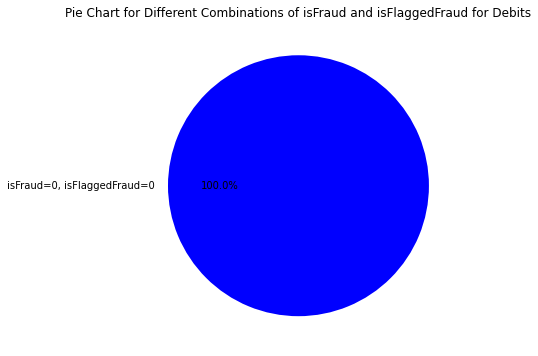

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
result_df = result.toPandas()

# Get counts of unique combinations of isFraud and isFlaggedFraud columns
counts = result_df.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')

# Define labels and colors
labels = [f'isFraud={row["isFraud"]}, isFlaggedFraud={row["isFlaggedFraud"]}' for idx, row in counts.iterrows()]
colors = ['Blue', 'orange']  # Define colors based on your requirements

# Plotting the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(counts['count'], labels=labels, colors=[colors[i] for i in range(len(counts))], autopct='%1.1f%%')
plt.title('Pie Chart for Different Combinations of isFraud and isFlaggedFraud for Debits')
plt.show()


In [0]:
result = spark.sql("""
    SELECT type, isFraud, isFlaggedFraud, 
    row_number() OVER (PARTITION BY type ORDER BY step) AS step_number
    FROM online_payment_fraud_table
    WHERE type='TRANSFER'
    GROUP BY type, isFraud , isFlaggedFraud, step
""")
result.show()

+--------+-------+--------------+-----------+
|    type|isFraud|isFlaggedFraud|step_number|
+--------+-------+--------------+-----------+
|TRANSFER|      0|             0|          1|
|TRANSFER|      1|             0|          2|
|TRANSFER|      0|             0|          3|
|TRANSFER|      1|             0|          4|
|TRANSFER|      0|             0|          5|
|TRANSFER|      1|             0|          6|
|TRANSFER|      1|             0|          7|
|TRANSFER|      0|             0|          8|
|TRANSFER|      0|             0|          9|
|TRANSFER|      1|             0|         10|
|TRANSFER|      1|             0|         11|
|TRANSFER|      0|             0|         12|
|TRANSFER|      0|             0|         13|
|TRANSFER|      1|             0|         14|
|TRANSFER|      0|             0|         15|
|TRANSFER|      1|             0|         16|
|TRANSFER|      0|             0|         17|
|TRANSFER|      1|             0|         18|
|TRANSFER|      1|             0| 

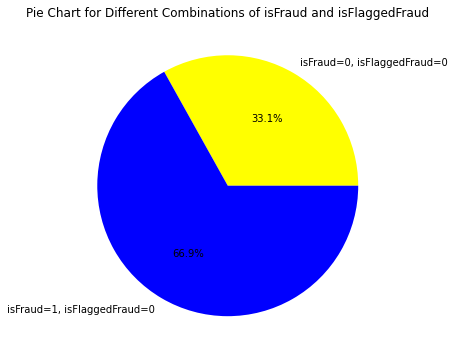

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
result_df = result.toPandas()

# Get counts of unique combinations of isFraud and isFlaggedFraud columns
counts = result_df.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')

# Define labels and colors
labels = [f'isFraud={row["isFraud"]}, isFlaggedFraud={row["isFlaggedFraud"]}' for idx, row in counts.iterrows()]
colors = ['Yellow', 'blue']  # Define colors based on your requirements

# Plotting the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(counts['count'], labels=labels, colors=[colors[i] for i in range(len(counts))], autopct='%1.1f%%')
plt.title('Pie Chart for Different Combinations of isFraud and isFlaggedFraud')
plt.show()
